### UK datasets - salary bands - NEW APPROACH

Data source and interactive plots: https://www.hesa.ac.uk/news/16-06-2022/sb263-higher-education-graduate-outcomes-statistics/salary<br>
Metadata: https://www.hesa.ac.uk/support/definitions/graduates<br>


Note:
- 22% of values are missing in the column "percent"
- cause salary is not mandatory, but self-reported
- catergory without missing values in 2017/18 and 2018/19:
    - Country of providers: ALL  (Region comparision is not possible as Wales got the most empties)
    - Domicile: ALL or ALL UK  (non-UK individuals are less willing to report)
    - Provider type: ALL
    - Level of qualification obtained: ALL or All postgraduate or All undergraduate
- use the same criterion in 2019/20:
    - missing values in male data
- There are two "Work population marker"
    - Paid employment is an activity -- employment 
    - Paid employment is most important activity  -- having activities more than employment

## 1. Prepare the workstation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data sets
salary_1718 = pd.read_csv('Salary bands 2017-18.csv')
salary_1819 = pd.read_csv('Salary bands 2018-19.csv')
salary_1920 = pd.read_csv('Salary bands 2019-20.csv')

# view one of the DataFrame
salary_1718.head()

Personal characteristic category        Salary band Country of provider  \
0                           Female  Less than £15,000                 All   
1                             Male  Less than £15,000                 All   
2                           Female  Less than £15,000                 All   
3                             Male  Less than £15,000                 All   
4                           Female  Less than £15,000                 All   

  Domicile Provider type Level of qualification obtained Mode of former study  \
0      All           All                             All                  All   
1      All           All                             All                  All   
2      All           All                All postgraduate                  All   
3      All           All                All postgraduate                  All   
4      All           All               All undergraduate                  All   

           Work population marker Academic year Percent  
0  Paid employment is an activity       2017/18      4%  
1  Paid employment is an activity       2017/18      3%  
2  Paid employment is an activity       2017/18      1%  
3  Paid employment is an activity       2017/18      1%  
4  Paid employment is an activity       2017/18      5%

In [3]:
# check the shape
print(salary_1718.shape)
print(salary_1819.shape)
print(salary_1920.shape)

(139628, 10)
(140036, 10)
(138876, 10)


In [4]:
# Check the columns and variables
salary_1718.describe()

Personal characteristic category        Salary band  \
count                            139628             139628   
unique                                2                 14   
top                              Female  £21,000 - £23,999   
freq                              69814              11396   

       Country of provider Domicile Provider type  \
count               139628   139628        139628   
unique                   5       11             3   
top                    All      All           All   
freq                 41628    22224         63636   

       Level of qualification obtained Mode of former study  \
count                           139628               139628   
unique                              14                    3   
top                                All                  All   
freq                             17740                52284   

                Work population marker Academic year Percent  
count                           139628        139628  108038  
unique                               2             1      63  
top     Paid employment is an activity       2017/18      1%  
freq                             70010        139628   11445

In [6]:
# Check the columns and variables
salary_1819.describe()

Personal characteristic category        Salary band  \
count                            140036             140036   
unique                                2                 14   
top                              Female  £30,000 - £32,999   
freq                              70018              11554   

       Country of provider Domicile Provider type  \
count               140036   140036        140036   
unique                   5       10             3   
top                    All      All           All   
freq                 41178    22508         64006   

       Level of qualification obtained Mode of former study  \
count                           140036               140036   
unique                              15                    3   
top                                All                  All   
freq                             17658                52074   

                Work population marker Academic year Percent  
count                           140036        140036  108297  
unique                               2             1      63  
top     Paid employment is an activity       2018/19      1%  
freq                             70288        140036   10616

In [7]:
# Check the columns and variables
salary_1920.describe()

Personal characteristic category        Salary band  \
count                            138876             138876   
unique                                2                 14   
top                              Female  £24,000 - £26,999   
freq                              69438              11456   

       Country of provider Domicile Provider type  \
count               138876   138876        138876   
unique                   5       11             3   
top                    All      All           All   
freq                 40856    22408         63648   

       Level of qualification obtained Mode of former study  \
count                           138876               138876   
unique                              15                    3   
top                                All                  All   
freq                             17684                52358   

                Work population marker Academic year Percent  
count                           138876        138876  106426  
unique                               2             1      64  
top     Paid employment is an activity       2019/20      1%  
freq                             69612        138876   11230

Domicile: 10 in 2018-19 <br>
Level of qualification obtained: 14 in 2017-18

In [8]:
# check for missing values
print('------ Data Frame: 19-20 ------')
print(salary_1920.isnull().sum())
print('------ Data Frame: 18-19------')
print(salary_1819.isnull().sum())
print('------ Data Frame: 17-18------')
print(salary_1718.isnull().sum())

------ Data Frame: 19-20 ------
Personal characteristic category        0
Salary band                             0
Country of provider                     0
Domicile                                0
Provider type                           0
Level of qualification obtained         0
Mode of former study                    0
Work population marker                  0
Academic year                           0
Percent                             32450
dtype: int64
------ Data Frame: 18-19------
Personal characteristic category        0
Salary band                             0
Country of provider                     0
Domicile                                0
Provider type                           0
Level of qualification obtained         0
Mode of former study                    0
Work population marker                  0
Academic year                           0
Percent                             31739
dtype: int64
------ Data Frame: 17-18------
Personal characteristic category        

In [9]:
# calculate the portion of missing values (for checking)
a = 31590/139628

a

0.22624401982410405

In [10]:
# calculate the portion of missing values
missing_1920 = round(salary_1920['Percent'].isnull().sum()/len(salary_1920['Percent'])*100, 4)

print(f'Missing values in 2019-20 dataset: {missing_1920}%.')

Missing values in 2019-20 dataset: 23.3662%.


In [11]:
# calculate the portion of missing values
missing_1819 = round(salary_1819['Percent'].isnull().sum()/len(salary_1819['Percent'])*100, 4)

print(f'Missing values in 2018-19 dataset: {missing_1819}%.')

Missing values in 2018-19 dataset: 22.6649%.


In [12]:
# calculate the portion of missing values
missing_1718 = round(salary_1718['Percent'].isnull().sum()/len(salary_1718['Percent'])*100, 4)

print(f'Missing values in 2017-18dataset: {missing_1718}%.')

Missing values in 2017-18dataset: 22.6244%.


Missing values take up **22%** of the column.

In [119]:
# merge all the datasets
salary = pd.concat([salary_1920, salary_1819, salary_1718])

salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418540 entries, 0 to 139627
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Personal characteristic category  418540 non-null  object
 1   Salary band                       418540 non-null  object
 2   Country of provider               418540 non-null  object
 3   Domicile                          418540 non-null  object
 4   Provider type                     418540 non-null  object
 5   Level of qualification obtained   418540 non-null  object
 6   Mode of former study              418540 non-null  object
 7   Work population marker            418540 non-null  object
 8   Academic year                     418540 non-null  object
 9   Percent                           322761 non-null  object
dtypes: object(10)
memory usage: 35.1+ MB


In [14]:
# Check the total number of rows
a = 139628 + 140036 + 138876

a

418540

In [120]:
# remove the symbol % in column "Percent"
salary['Percent'] = salary['Percent'].str.replace("%", "")

# check the changes
salary.head()

Personal characteristic category        Salary band Country of provider  \
0                           Female  Less than £15,000                 All   
1                             Male  Less than £15,000                 All   
2                           Female  Less than £15,000                 All   
3                             Male  Less than £15,000                 All   
4                           Female  Less than £15,000                 All   

  Domicile Provider type Level of qualification obtained Mode of former study  \
0      All           All                             All                  All   
1      All           All                             All                  All   
2      All           All                All postgraduate                  All   
3      All           All                All postgraduate                  All   
4      All           All               All undergraduate                  All   

           Work population marker Academic year Percent  
0  Paid employment is an activity       2019/20       3  
1  Paid employment is an activity       2019/20       2  
2  Paid employment is an activity       2019/20       1  
3  Paid employment is an activity       2019/20       1  
4  Paid employment is an activity       2019/20       4

In [121]:
# change the data type of the column "Percent"
salary['Percent'] = salary['Percent'].astype(float)

# check the changes
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418540 entries, 0 to 139627
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Personal characteristic category  418540 non-null  object 
 1   Salary band                       418540 non-null  object 
 2   Country of provider               418540 non-null  object 
 3   Domicile                          418540 non-null  object 
 4   Provider type                     418540 non-null  object 
 5   Level of qualification obtained   418540 non-null  object 
 6   Mode of former study              418540 non-null  object 
 7   Work population marker            418540 non-null  object 
 8   Academic year                     418540 non-null  object 
 9   Percent                           322761 non-null  float64
dtypes: float64(1), object(9)
memory usage: 35.1+ MB


In [122]:
# rename some of the columns
salary.columns = ['Gender', 'Salary band', 'Country of provider', 'Domicile',
                  'Provider type', 'Level of qualification obtained', 'Mode of former study',
                  'Work population marker', 'Year', 'Percent']

salary.head()

Gender        Salary band Country of provider Domicile Provider type  \
0  Female  Less than £15,000                 All      All           All   
1    Male  Less than £15,000                 All      All           All   
2  Female  Less than £15,000                 All      All           All   
3    Male  Less than £15,000                 All      All           All   
4  Female  Less than £15,000                 All      All           All   

  Level of qualification obtained Mode of former study  \
0                             All                  All   
1                             All                  All   
2                All postgraduate                  All   
3                All postgraduate                  All   
4               All undergraduate                  All   

           Work population marker     Year  Percent  
0  Paid employment is an activity  2019/20      3.0  
1  Paid employment is an activity  2019/20      2.0  
2  Paid employment is an activity  2019/20      1.0  
3  Paid employment is an activity  2019/20      1.0  
4  Paid employment is an activity  2019/20      4.0

## 2. Subset and explore
**NOTE: missing values are kept to avoid misinterpretation caused by no data**

## Case 1: All

In [123]:
# subset the merged DataFrame
salary_all_employed = salary[(salary['Work population marker'] == "Paid employment is an activity") &
                             (salary['Country of provider'] == "All") &
                             (salary['Domicile'] == "All") &
                             (salary['Provider type'] == "All") &
                             (salary['Level of qualification obtained'] == "All") &
                             (salary['Mode of former study'] == "All")].reset_index().copy()
                                        
salary_all_employed.head()

index  Gender        Salary band Country of provider Domicile  \
0      0  Female  Less than £15,000                 All      All   
1      1    Male  Less than £15,000                 All      All   
2   8816  Female  £15,000 - £17,999                 All      All   
3   8817    Male  £15,000 - £17,999                 All      All   
4  18236  Female  £18,000 - £20,999                 All      All   

  Provider type Level of qualification obtained Mode of former study  \
0           All                             All                  All   
1           All                             All                  All   
2           All                             All                  All   
3           All                             All                  All   
4           All                             All                  All   

           Work population marker     Year  Percent  
0  Paid employment is an activity  2019/20      3.0  
1  Paid employment is an activity  2019/20      2.0  
2  Paid employment is an activity  2019/20      5.0  
3  Paid employment is an activity  2019/20      4.0  
4  Paid employment is an activity  2019/20     13.0

In [124]:
# check the missing values
print(salary_all_employed.isnull().sum())

index                              0
Gender                             0
Salary band                        0
Country of provider                0
Domicile                           0
Provider type                      0
Level of qualification obtained    0
Mode of former study               0
Work population marker             0
Year                               0
Percent                            0
dtype: int64


In [125]:
# drop the unnecessary columns
salary_all_employed.drop(columns=['index',
                                  'Country of provider',
                                  'Domicile',
                                  'Provider type',
                                  'Level of qualification obtained',
                                  'Mode of former study',
                                  'Work population marker'],
                         inplace=True)
           
# Check the changes
salary_all_employed.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      3.0
1    Male  Less than £15,000  2019/20      2.0
2  Female  £15,000 - £17,999  2019/20      5.0
3    Male  £15,000 - £17,999  2019/20      4.0
4  Female  £18,000 - £20,999  2019/20     13.0

In [126]:
salary_all_employed_female = salary_all_employed[salary_all_employed['Gender'] == "Female"].reset_index().copy()

salary_all_employed_female.head()

index  Gender        Salary band     Year  Percent
0      0  Female  Less than £15,000  2019/20      3.0
1      2  Female  £15,000 - £17,999  2019/20      5.0
2      4  Female  £18,000 - £20,999  2019/20     13.0
3      6  Female  £21,000 - £23,999  2019/20     13.0
4      8  Female  £24,000 - £26,999  2019/20     24.0

In [127]:
salary_all_employed_male = salary_all_employed[salary_all_employed['Gender'] == "Male"].reset_index().copy()

salary_all_employed_male.head()

index Gender        Salary band     Year  Percent
0      1   Male  Less than £15,000  2019/20      2.0
1      3   Male  £15,000 - £17,999  2019/20      4.0
2      5   Male  £18,000 - £20,999  2019/20     11.0
3      7   Male  £21,000 - £23,999  2019/20     11.0
4      9   Male  £24,000 - £26,999  2019/20     17.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

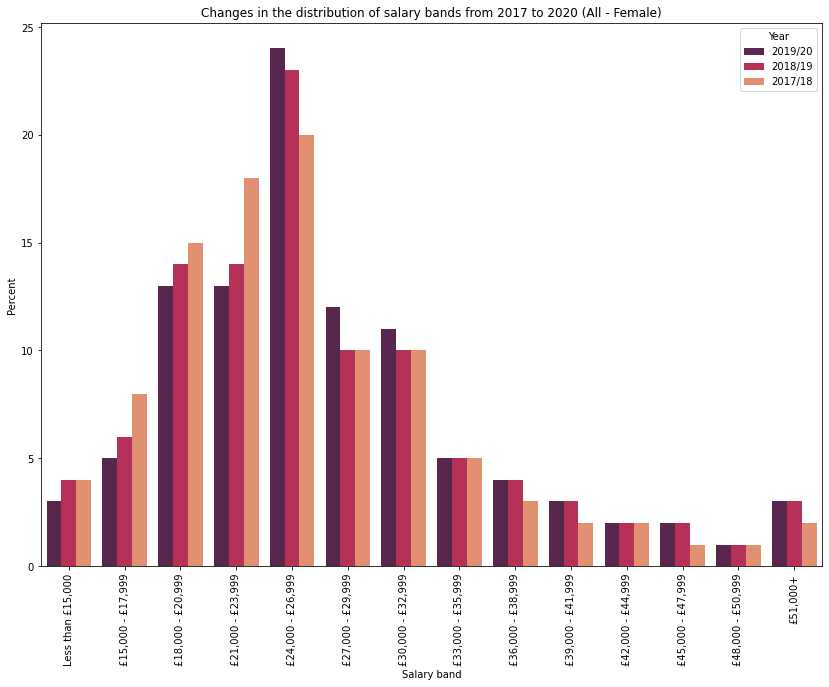

In [128]:
# The changes over distribution of FEMALE salary bands from 2017 to 2020
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_all_employed_female,
            palette="rocket")
plt.title("Changes in the distribution of salary bands from 2017 to 2020 (All - Female)")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

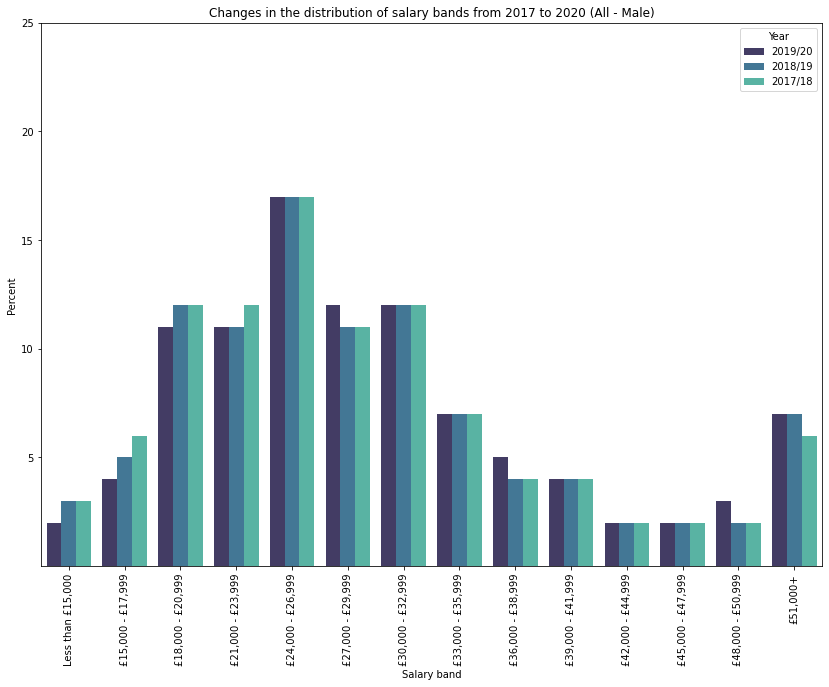

In [86]:
# The changes over distribution of FEMALE salary bands from 2017 to 2020
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_all_employed_male,
            palette="mako")

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (All - Male)")

plt.yticks([5,10,15,20,25])

plt.xticks(rotation=90)

In [26]:
# subset of 2019/20
salary_all_employed_1920 = salary_all_employed[salary_all_employed['Year'] == "2019/20"]

salary_all_employed_1920.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      3.0
1    Male  Less than £15,000  2019/20      2.0
2  Female  £15,000 - £17,999  2019/20      5.0
3    Male  £15,000 - £17,999  2019/20      4.0
4  Female  £18,000 - £20,999  2019/20     13.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

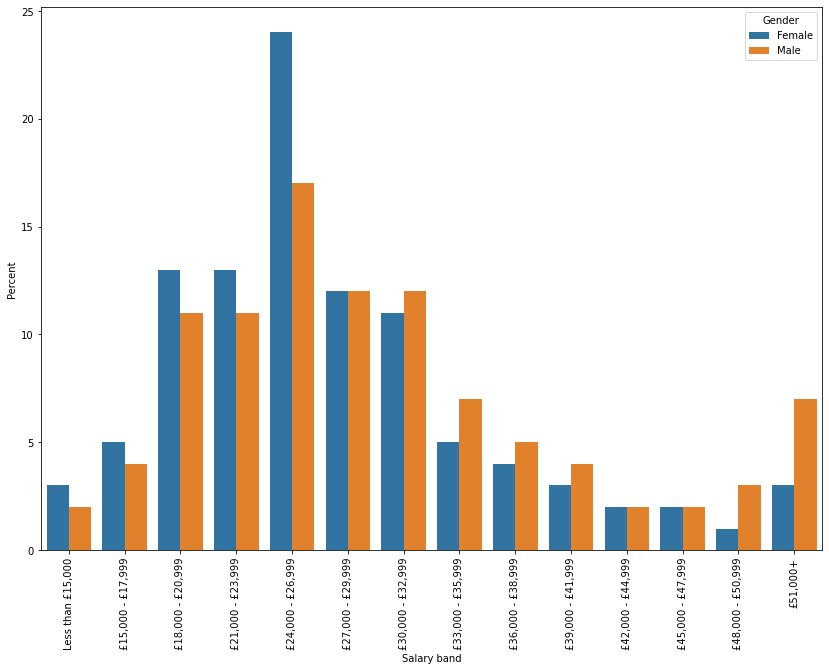

In [27]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_all_employed_1920)

plt.xticks(rotation=90)

## Case 2: All undergraduates

In [28]:
salary['Level of qualification obtained'].value_counts()

All                                               53082
All undergraduate                                 49254
All postgraduate                                  45308
First degree                                      44368
Masters taught                                    38760
Other postgraduate taught                         36032
Other undergraduate                               33876
Doctorate research                                31236
Postgraduate Certificate in Education             18904
Other postgraduate research                       18320
HNC/HND                                           16460
Foundation degree                                 16084
Professional Graduate Certificate in Education     9504
Undergraduate unknown                              5912
Postgraduate unknown                               1440
Name: Level of qualification obtained, dtype: int64

In [29]:
# subset the merged DataFrame
salary_undergrad_employed = salary[(salary['Work population marker'] == "Paid employment is an activity") &
                             (salary['Country of provider'] == "All") &
                             (salary['Domicile'] == "All") &
                             (salary['Provider type'] == "All") &
                             (salary['Level of qualification obtained'] == "All undergraduate") &
                             (salary['Mode of former study'] == "All")].reset_index().copy()
                                        
salary_undergrad_employed.head()

index  Gender        Salary band Country of provider Domicile  \
0      4  Female  Less than £15,000                 All      All   
1      5    Male  Less than £15,000                 All      All   
2   8820  Female  £15,000 - £17,999                 All      All   
3   8821    Male  £15,000 - £17,999                 All      All   
4  18240  Female  £18,000 - £20,999                 All      All   

  Provider type Level of qualification obtained Mode of former study  \
0           All               All undergraduate                  All   
1           All               All undergraduate                  All   
2           All               All undergraduate                  All   
3           All               All undergraduate                  All   
4           All               All undergraduate                  All   

           Work population marker     Year  Percent  
0  Paid employment is an activity  2019/20      4.0  
1  Paid employment is an activity  2019/20      3.0  
2  Paid employment is an activity  2019/20      6.0  
3  Paid employment is an activity  2019/20      4.0  
4  Paid employment is an activity  2019/20     16.0

In [30]:
# check the missing values
print(salary_undergrad_employed.isnull().sum())

index                              0
Gender                             0
Salary band                        0
Country of provider                0
Domicile                           0
Provider type                      0
Level of qualification obtained    0
Mode of former study               0
Work population marker             0
Year                               0
Percent                            0
dtype: int64


In [31]:
# drop the unnecessary columns
salary_undergrad_employed.drop(columns=['index',
                                  'Country of provider',
                                  'Domicile',
                                  'Provider type',
                                  'Level of qualification obtained',
                                  'Mode of former study',
                                  'Work population marker'],
                         inplace=True)
           
# Check the changes
salary_undergrad_employed.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      4.0
1    Male  Less than £15,000  2019/20      3.0
2  Female  £15,000 - £17,999  2019/20      6.0
3    Male  £15,000 - £17,999  2019/20      4.0
4  Female  £18,000 - £20,999  2019/20     16.0

In [32]:
salary_undergrad_employed_female = \
salary_undergrad_employed[salary_all_employed['Gender'] == "Female"].reset_index().copy()

salary_undergrad_employed_female.head()

index  Gender        Salary band     Year  Percent
0      0  Female  Less than £15,000  2019/20      4.0
1      2  Female  £15,000 - £17,999  2019/20      6.0
2      4  Female  £18,000 - £20,999  2019/20     16.0
3      6  Female  £21,000 - £23,999  2019/20     15.0
4      8  Female  £24,000 - £26,999  2019/20     27.0

In [33]:
salary_undergrad_employed_male = \
salary_undergrad_employed[salary_all_employed['Gender'] == "Male"].reset_index().copy()

salary_undergrad_employed_male.head()

index Gender        Salary band     Year  Percent
0      1   Male  Less than £15,000  2019/20      3.0
1      3   Male  £15,000 - £17,999  2019/20      4.0
2      5   Male  £18,000 - £20,999  2019/20     14.0
3      7   Male  £21,000 - £23,999  2019/20     13.0
4      9   Male  £24,000 - £26,999  2019/20     19.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

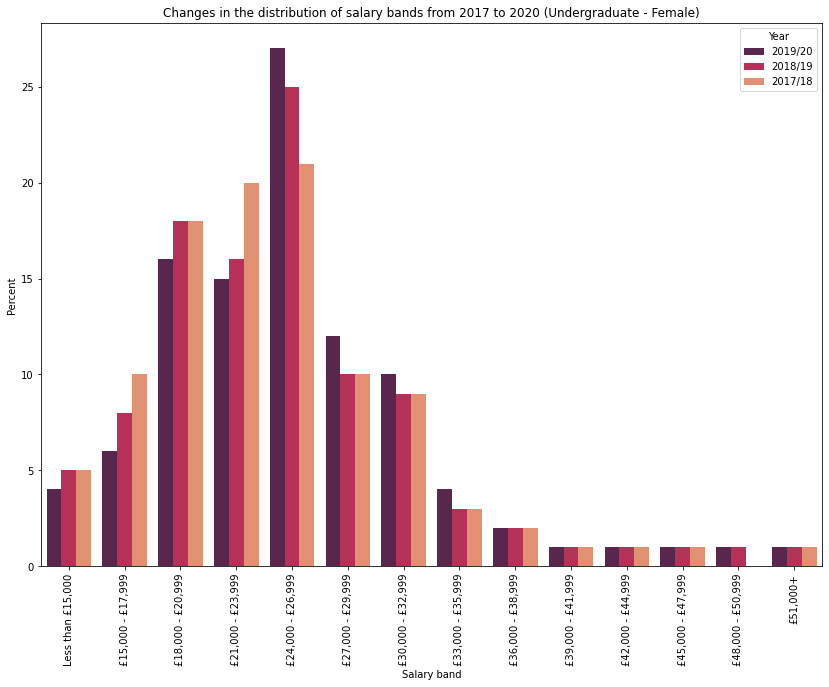

In [87]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_undergrad_employed_female,
            palette="rocket")

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Undergraduate - Female)")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

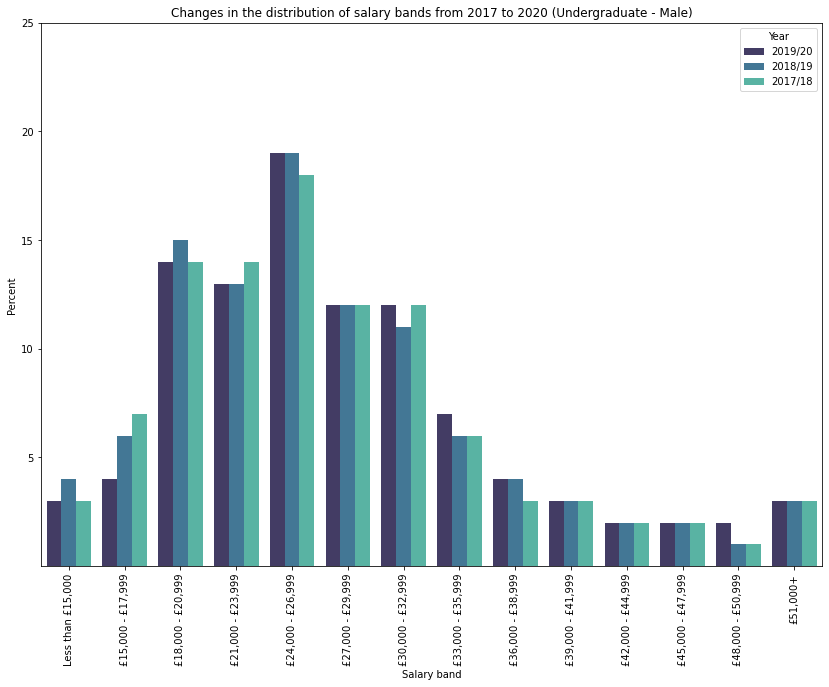

In [88]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_undergrad_employed_male,
            palette="mako")


plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Undergraduate - Male)")

plt.yticks([5,10,15,20,25])

plt.xticks(rotation=90)

In [36]:
# subset of 2019/20
salary_undergrad_employed_1920 = salary_undergrad_employed[salary_undergrad_employed['Year'] == "2019/20"]

salary_undergrad_employed_1920.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      4.0
1    Male  Less than £15,000  2019/20      3.0
2  Female  £15,000 - £17,999  2019/20      6.0
3    Male  £15,000 - £17,999  2019/20      4.0
4  Female  £18,000 - £20,999  2019/20     16.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

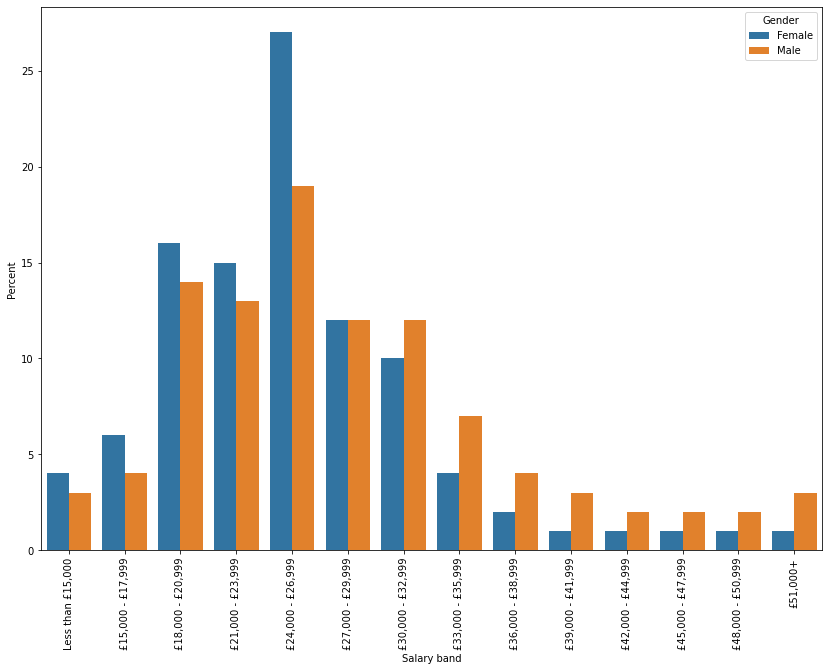

In [37]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_undergrad_employed_1920)

plt.xticks(rotation=90)

## Case 3: All postgraduates

In [38]:
# subset the merged DataFrame
salary_postgrad_employed = salary[(salary['Work population marker'] == "Paid employment is an activity") &
                                  (salary['Country of provider'] == "All") &
                                  (salary['Domicile'] == "All") &
                                  (salary['Provider type'] == "All") &
                                  (salary['Level of qualification obtained'] == "All postgraduate") &
                                  (salary['Mode of former study'] == "All")].reset_index().copy()
                                          
salary_postgrad_employed.head()

index  Gender        Salary band Country of provider Domicile  \
0      2  Female  Less than £15,000                 All      All   
1      3    Male  Less than £15,000                 All      All   
2   8818  Female  £15,000 - £17,999                 All      All   
3   8819    Male  £15,000 - £17,999                 All      All   
4  18238  Female  £18,000 - £20,999                 All      All   

  Provider type Level of qualification obtained Mode of former study  \
0           All                All postgraduate                  All   
1           All                All postgraduate                  All   
2           All                All postgraduate                  All   
3           All                All postgraduate                  All   
4           All                All postgraduate                  All   

           Work population marker     Year  Percent  
0  Paid employment is an activity  2019/20      1.0  
1  Paid employment is an activity  2019/20      1.0  
2  Paid employment is an activity  2019/20      3.0  
3  Paid employment is an activity  2019/20      2.0  
4  Paid employment is an activity  2019/20      8.0

In [39]:
# Check for missing values
print(salary_postgrad_employed.isnull().sum())

index                              0
Gender                             0
Salary band                        0
Country of provider                0
Domicile                           0
Provider type                      0
Level of qualification obtained    0
Mode of former study               0
Work population marker             0
Year                               0
Percent                            0
dtype: int64


In [40]:
# drop the unnecessary columns
salary_postgrad_employed.drop(columns=['index',
                                      'Country of provider',
                                      'Domicile',
                                      'Provider type',
                                      'Level of qualification obtained',
                                      'Mode of former study',
                                      'Work population marker'],
                             inplace=True)
             
# Check the changes
salary_postgrad_employed.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      1.0
1    Male  Less than £15,000  2019/20      1.0
2  Female  £15,000 - £17,999  2019/20      3.0
3    Male  £15,000 - £17,999  2019/20      2.0
4  Female  £18,000 - £20,999  2019/20      8.0

In [41]:
salary_postgrad_employed_female =\
salary_postgrad_employed[salary_postgrad_employed['Gender'] == "Female"]

salary_postgrad_employed_female.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      1.0
2  Female  £15,000 - £17,999  2019/20      3.0
4  Female  £18,000 - £20,999  2019/20      8.0
6  Female  £21,000 - £23,999  2019/20      9.0
8  Female  £24,000 - £26,999  2019/20     18.0

In [42]:
salary_postgrad_employed_male =\
salary_postgrad_employed[salary_postgrad_employed['Gender'] == "Male"]

salary_postgrad_employed_male.head()

Gender        Salary band     Year  Percent
1   Male  Less than £15,000  2019/20      1.0
3   Male  £15,000 - £17,999  2019/20      2.0
5   Male  £18,000 - £20,999  2019/20      6.0
7   Male  £21,000 - £23,999  2019/20      7.0
9   Male  £24,000 - £26,999  2019/20     13.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

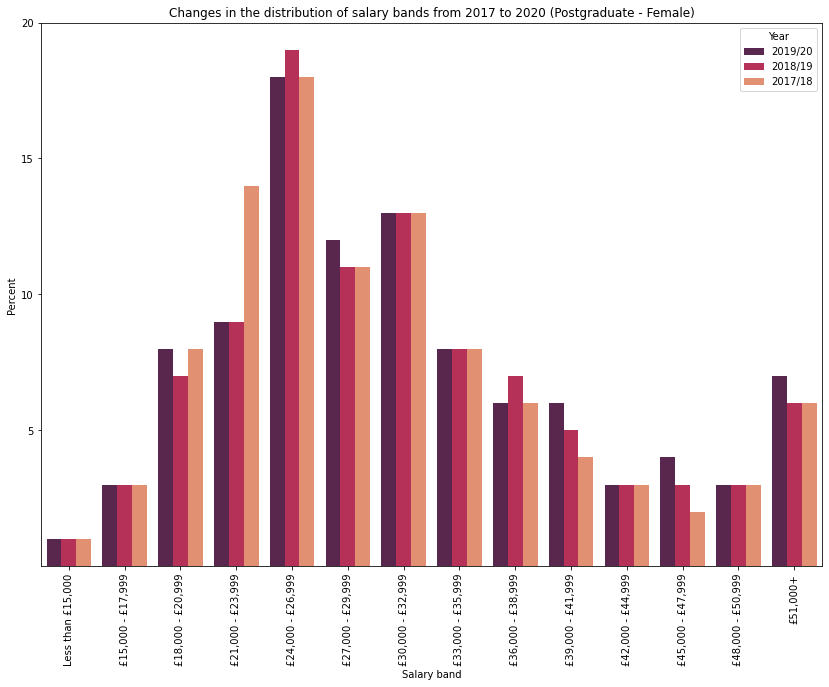

In [130]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_postgrad_employed_female,
            palette="rocket")

plt.yticks([5,10,15,20])

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Postgraduate - Female)")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

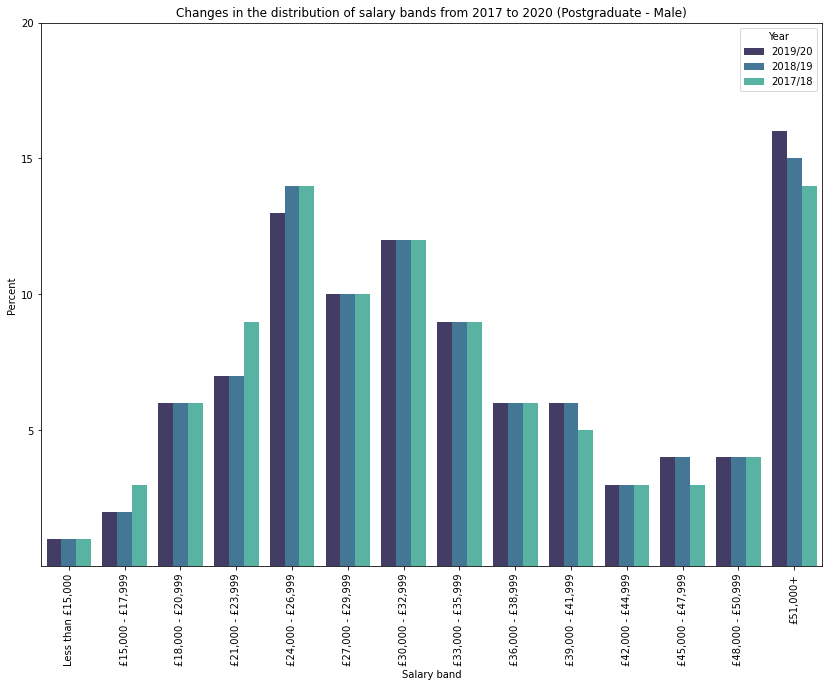

In [131]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_postgrad_employed_male,
            palette="mako")

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Postgraduate - Male)")

plt.yticks([5,10,15,20])

plt.xticks(rotation=90)

In [45]:
# Subset of 2019/20
salary_postgrad_employed_1920 = salary_postgrad_employed[salary_all_employed['Year'] == "2019/20"]

salary_postgrad_employed_1920.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      1.0
1    Male  Less than £15,000  2019/20      1.0
2  Female  £15,000 - £17,999  2019/20      3.0
3    Male  £15,000 - £17,999  2019/20      2.0
4  Female  £18,000 - £20,999  2019/20      8.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

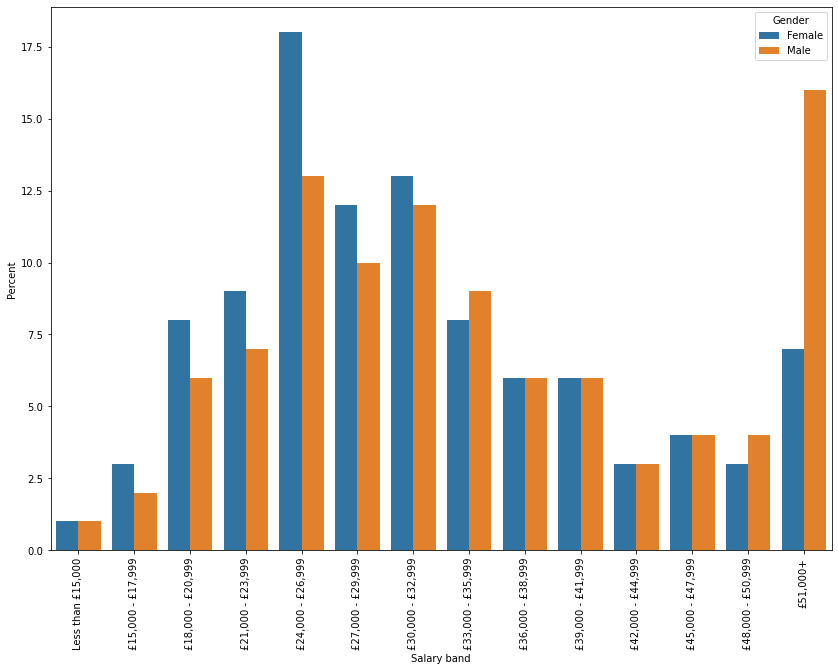

In [46]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_postgrad_employed_1920)

plt.xticks(rotation=90)

#### - Changes in pays of females while not much change in males in the period of 2020
#### - Pays of undergraduate are normally distrisbuted while pays of postgraduate are bimodal distributed (two peaks)

Problem: this is the data of overall graduates, not STEM specific!!<br>
How to link with our topic??

# Part II: Paid employment is most important activity

In [47]:
# subset the merged DataFrame
salary_all_most_employed = salary[(salary['Work population marker'] == "Paid employment is most important activity") &
                                  (salary['Country of provider'] == "All") &
                                  (salary['Domicile'] == "All") &
                                  (salary['Provider type'] == "All") &
                                  (salary['Level of qualification obtained'] == "All") &
                                  (salary['Mode of former study'] == "All")].reset_index().copy()
                                          
salary_all_most_employed.head()

index  Gender        Salary band Country of provider Domicile  \
0     30  Female  Less than £15,000                 All      All   
1     31    Male  Less than £15,000                 All      All   
2   8844  Female  £15,000 - £17,999                 All      All   
3   8845    Male  £15,000 - £17,999                 All      All   
4  18264  Female  £18,000 - £20,999                 All      All   

  Provider type Level of qualification obtained Mode of former study  \
0           All                             All                  All   
1           All                             All                  All   
2           All                             All                  All   
3           All                             All                  All   
4           All                             All                  All   

                       Work population marker     Year  Percent  
0  Paid employment is most important activity  2019/20      3.0  
1  Paid employment is most important activity  2019/20      2.0  
2  Paid employment is most important activity  2019/20      4.0  
3  Paid employment is most important activity  2019/20      3.0  
4  Paid employment is most important activity  2019/20     13.0

In [48]:
# check the missing values
print(salary_all_most_employed.isnull().sum())

index                              0
Gender                             0
Salary band                        0
Country of provider                0
Domicile                           0
Provider type                      0
Level of qualification obtained    0
Mode of former study               0
Work population marker             0
Year                               0
Percent                            0
dtype: int64


In [49]:
# drop the unnecessary columns
salary_all_most_employed.drop(columns=['index',
                                  'Country of provider',
                                  'Domicile',
                                  'Provider type',
                                  'Level of qualification obtained',
                                  'Mode of former study',
                                  'Work population marker'],
                         inplace=True)
           
# Check the changes
salary_all_most_employed.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      3.0
1    Male  Less than £15,000  2019/20      2.0
2  Female  £15,000 - £17,999  2019/20      4.0
3    Male  £15,000 - £17,999  2019/20      3.0
4  Female  £18,000 - £20,999  2019/20     13.0

In [50]:
salary_all_most_employed_female = \
salary_all_most_employed[salary_all_most_employed['Gender'] == "Female"].reset_index().copy()

salary_all_most_employed_female.head()

index  Gender        Salary band     Year  Percent
0      0  Female  Less than £15,000  2019/20      3.0
1      2  Female  £15,000 - £17,999  2019/20      4.0
2      4  Female  £18,000 - £20,999  2019/20     13.0
3      6  Female  £21,000 - £23,999  2019/20     13.0
4      8  Female  £24,000 - £26,999  2019/20     24.0

In [51]:
salary_all_most_employed_male = \
salary_all_most_employed[salary_all_most_employed['Gender'] == "Male"].reset_index().copy()

salary_all_most_employed_male.head()

index Gender        Salary band     Year  Percent
0      1   Male  Less than £15,000  2019/20      2.0
1      3   Male  £15,000 - £17,999  2019/20      3.0
2      5   Male  £18,000 - £20,999  2019/20     11.0
3      7   Male  £21,000 - £23,999  2019/20     11.0
4      9   Male  £24,000 - £26,999  2019/20     17.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

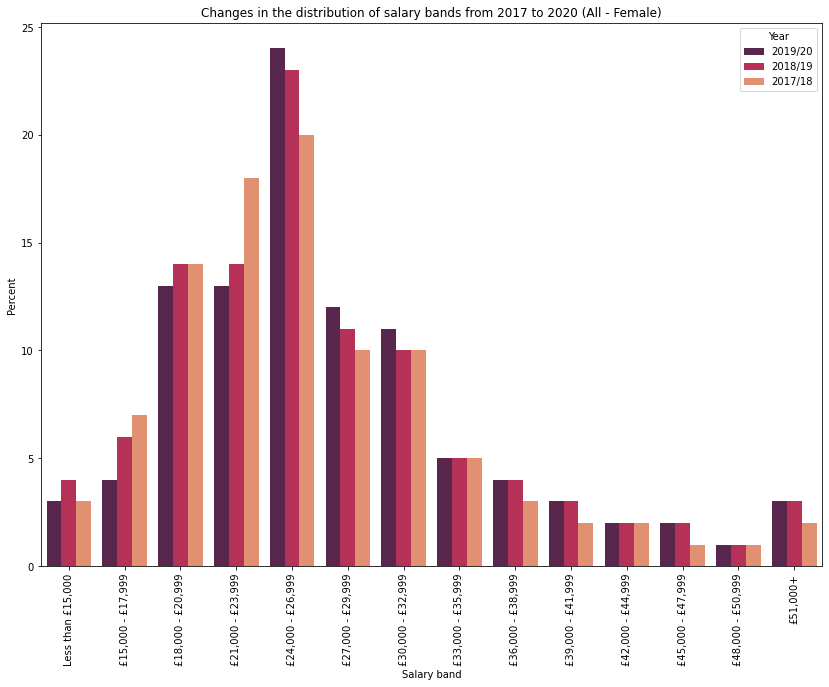

In [91]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_all_most_employed_female,
            palette="rocket")

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (All - Female)")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

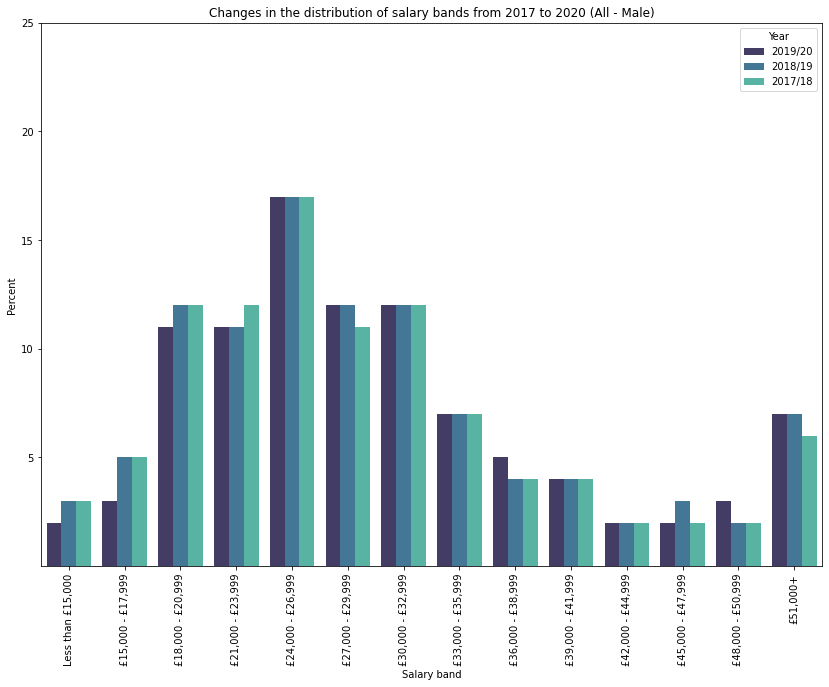

In [93]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_all_most_employed_male,
            palette="mako")

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (All - Male)")

plt.yticks([5,10,15,20,25])

plt.xticks(rotation=90)

In [62]:
# Subset of 2019/20
salary_all_most_employed_1920 = salary_all_most_employed[salary_all_most_employed['Year'] == "2019/20"]

salary_all_most_employed_1920.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      3.0
1    Male  Less than £15,000  2019/20      2.0
2  Female  £15,000 - £17,999  2019/20      4.0
3    Male  £15,000 - £17,999  2019/20      3.0
4  Female  £18,000 - £20,999  2019/20     13.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

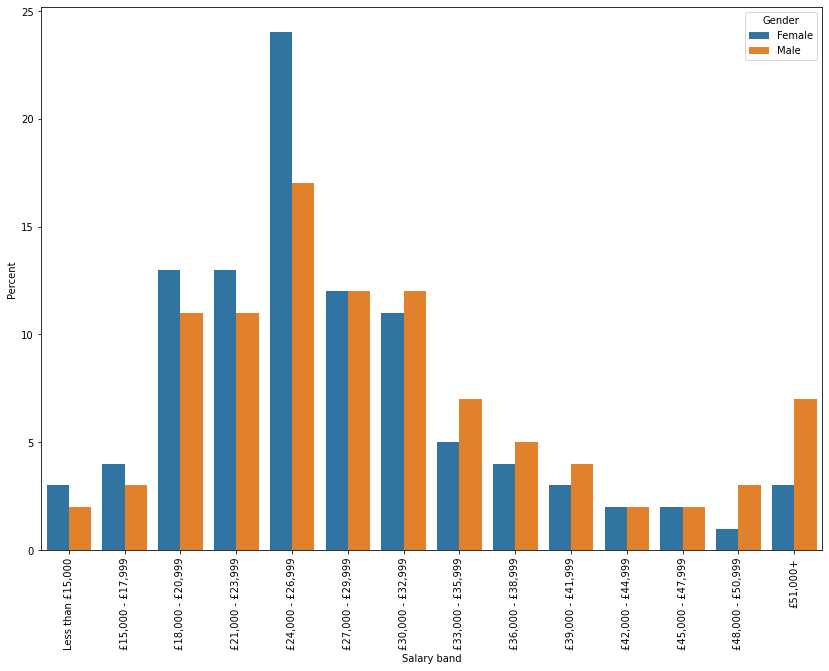

In [63]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_all_most_employed_1920)

plt.xticks(rotation=90)

In [66]:
# subset the merged DataFrame
salary_undergrad_most_employed = salary[(salary['Work population marker'] == "Paid employment is most important activity") &
                                  (salary['Country of provider'] == "All") &
                                  (salary['Domicile'] == "All") &
                                  (salary['Provider type'] == "All") &
                                  (salary['Level of qualification obtained'] == "All undergraduate") &
                                  (salary['Mode of former study'] == "All")].reset_index().copy()
                                          
salary_undergrad_most_employed.head()

index  Gender        Salary band Country of provider Domicile  \
0     34  Female  Less than £15,000                 All      All   
1     35    Male  Less than £15,000                 All      All   
2   8848  Female  £15,000 - £17,999                 All      All   
3   8849    Male  £15,000 - £17,999                 All      All   
4  18268  Female  £18,000 - £20,999                 All      All   

  Provider type Level of qualification obtained Mode of former study  \
0           All               All undergraduate                  All   
1           All               All undergraduate                  All   
2           All               All undergraduate                  All   
3           All               All undergraduate                  All   
4           All               All undergraduate                  All   

                       Work population marker     Year  Percent  
0  Paid employment is most important activity  2019/20      4.0  
1  Paid employment is most important activity  2019/20      3.0  
2  Paid employment is most important activity  2019/20      5.0  
3  Paid employment is most important activity  2019/20      4.0  
4  Paid employment is most important activity  2019/20     16.0

In [67]:
# check the missing values
print(salary_undergrad_most_employed.isnull().sum())

index                              0
Gender                             0
Salary band                        0
Country of provider                0
Domicile                           0
Provider type                      0
Level of qualification obtained    0
Mode of former study               0
Work population marker             0
Year                               0
Percent                            0
dtype: int64


In [68]:
# drop the unnecessary columns
salary_undergrad_most_employed.drop(columns=['index',
                                  'Country of provider',
                                  'Domicile',
                                  'Provider type',
                                  'Level of qualification obtained',
                                  'Mode of former study',
                                  'Work population marker'],
                         inplace=True)
           
# Check the changes
salary_undergrad_most_employed.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      4.0
1    Male  Less than £15,000  2019/20      3.0
2  Female  £15,000 - £17,999  2019/20      5.0
3    Male  £15,000 - £17,999  2019/20      4.0
4  Female  £18,000 - £20,999  2019/20     16.0

In [50]:
salary_all_most_employed_female = \
salary_all_most_employed[salary_all_most_employed['Gender'] == "Female"].reset_index().copy()

salary_all_most_employed_female.head()

index  Gender        Salary band     Year  Percent
0      0  Female  Less than £15,000  2019/20      3.0
1      2  Female  £15,000 - £17,999  2019/20      4.0
2      4  Female  £18,000 - £20,999  2019/20     13.0
3      6  Female  £21,000 - £23,999  2019/20     13.0
4      8  Female  £24,000 - £26,999  2019/20     24.0

In [69]:
salary_undergrad_most_employed_male = \
salary_undergrad_most_employed[salary_undergrad_most_employed['Gender'] == "Male"].reset_index().copy()

salary_undergrad_most_employed_male.head()

index Gender        Salary band     Year  Percent
0      1   Male  Less than £15,000  2019/20      3.0
1      3   Male  £15,000 - £17,999  2019/20      4.0
2      5   Male  £18,000 - £20,999  2019/20     13.0
3      7   Male  £21,000 - £23,999  2019/20     13.0
4      9   Male  £24,000 - £26,999  2019/20     19.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

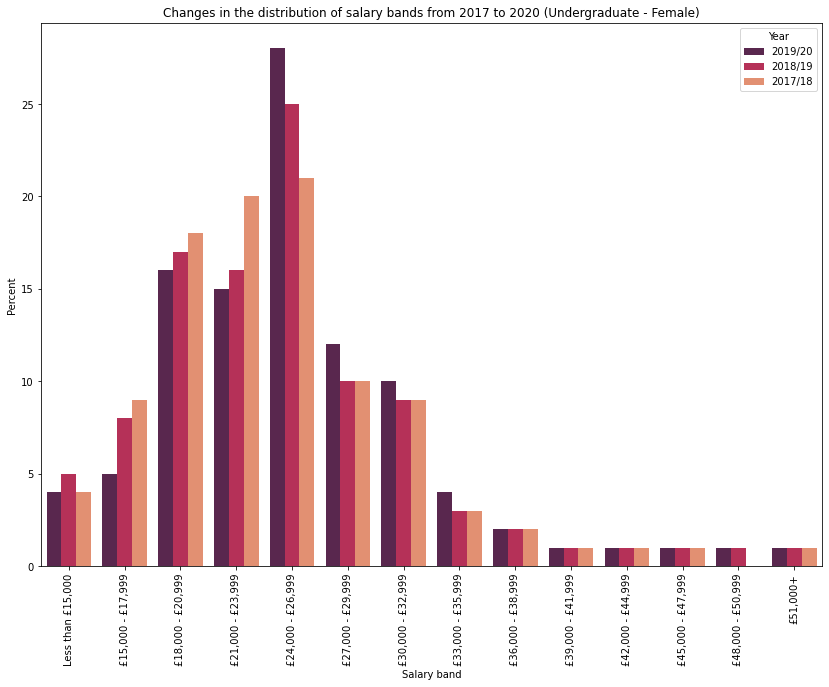

In [94]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_undergrad_most_employed_female,
            palette="rocket")

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Undergraduate - Female)")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

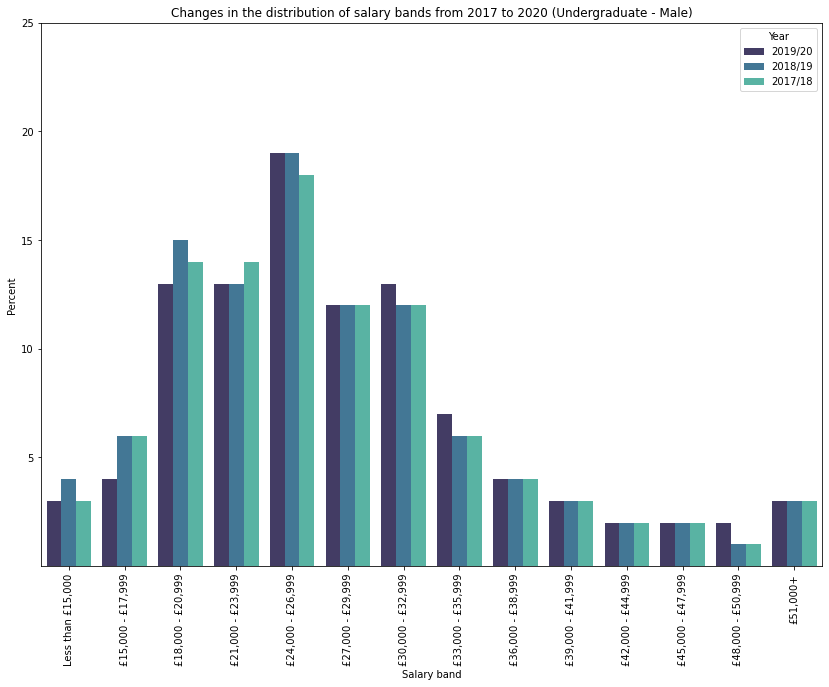

In [96]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_undergrad_most_employed_male,
            palette="mako")


plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Undergraduate - Male)")

plt.yticks([5,10,15,20,25])

plt.xticks(rotation=90)

In [72]:
# Subset of 2019/20
salary_undergrad_most_employed_1920 = salary_undergrad_most_employed[salary_all_most_employed['Year'] == "2019/20"]

salary_undergrad_most_employed_1920.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      4.0
1    Male  Less than £15,000  2019/20      3.0
2  Female  £15,000 - £17,999  2019/20      5.0
3    Male  £15,000 - £17,999  2019/20      4.0
4  Female  £18,000 - £20,999  2019/20     16.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

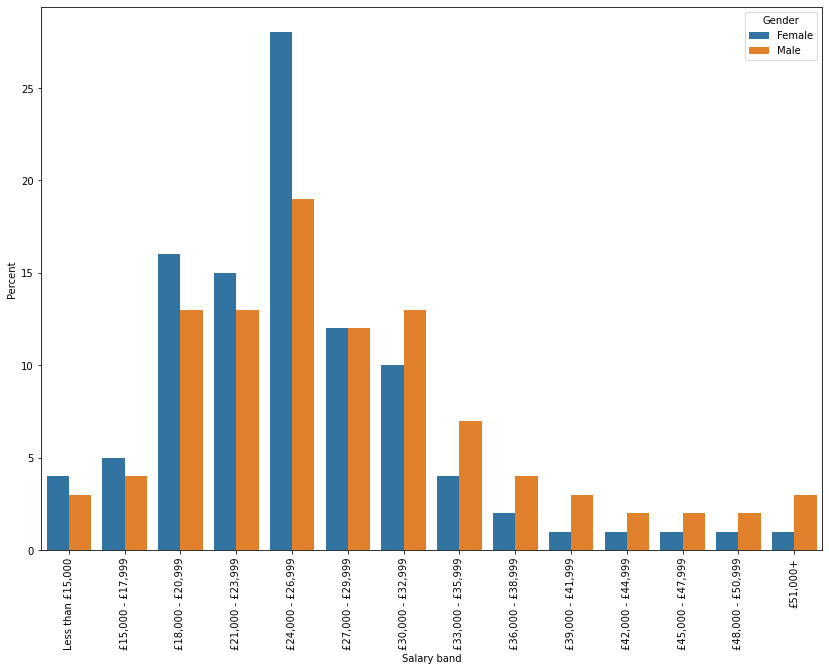

In [73]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_undergrad_most_employed_1920)

plt.xticks(rotation=90)

### All Postgraduates

In [75]:
# subset the merged DataFrame
salary_postgrad_most_employed = salary[(salary['Work population marker'] == "Paid employment is most important activity") &
                                  (salary['Country of provider'] == "All") &
                                  (salary['Domicile'] == "All") &
                                  (salary['Provider type'] == "All") &
                                  (salary['Level of qualification obtained'] == "All postgraduate") &
                                  (salary['Mode of former study'] == "All")].reset_index().copy()
                                          
salary_postgrad_most_employed.head()

index  Gender        Salary band Country of provider Domicile  \
0     32  Female  Less than £15,000                 All      All   
1     33    Male  Less than £15,000                 All      All   
2   8846  Female  £15,000 - £17,999                 All      All   
3   8847    Male  £15,000 - £17,999                 All      All   
4  18266  Female  £18,000 - £20,999                 All      All   

  Provider type Level of qualification obtained Mode of former study  \
0           All                All postgraduate                  All   
1           All                All postgraduate                  All   
2           All                All postgraduate                  All   
3           All                All postgraduate                  All   
4           All                All postgraduate                  All   

                       Work population marker     Year  Percent  
0  Paid employment is most important activity  2019/20      1.0  
1  Paid employment is most important activity  2019/20      1.0  
2  Paid employment is most important activity  2019/20      2.0  
3  Paid employment is most important activity  2019/20      2.0  
4  Paid employment is most important activity  2019/20      8.0

In [76]:
# check the missing values
print(salary_postgrad_most_employed.isnull().sum())

index                              0
Gender                             0
Salary band                        0
Country of provider                0
Domicile                           0
Provider type                      0
Level of qualification obtained    0
Mode of former study               0
Work population marker             0
Year                               0
Percent                            0
dtype: int64


In [77]:
# drop the unnecessary columns
salary_postgrad_most_employed.drop(columns=['index',
                                  'Country of provider',
                                  'Domicile',
                                  'Provider type',
                                  'Level of qualification obtained',
                                  'Mode of former study',
                                  'Work population marker'],
                         inplace=True)
           
# Check the changes
salary_postgrad_most_employed.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      1.0
1    Male  Less than £15,000  2019/20      1.0
2  Female  £15,000 - £17,999  2019/20      2.0
3    Male  £15,000 - £17,999  2019/20      2.0
4  Female  £18,000 - £20,999  2019/20      8.0

In [78]:
salary_postgrad_most_employed_female = \
salary_postgrad_most_employed[salary_postgrad_most_employed['Gender'] == "Female"].reset_index().copy()

salary_postgrad_most_employed_female.head()

index  Gender        Salary band     Year  Percent
0      0  Female  Less than £15,000  2019/20      1.0
1      2  Female  £15,000 - £17,999  2019/20      2.0
2      4  Female  £18,000 - £20,999  2019/20      8.0
3      6  Female  £21,000 - £23,999  2019/20      9.0
4      8  Female  £24,000 - £26,999  2019/20     18.0

In [79]:
salary_postgrad_most_employed_male = \
salary_postgrad_most_employed[salary_postgrad_most_employed['Gender'] == "Male"].reset_index().copy()

salary_postgrad_most_employed_male.head()

index Gender        Salary band     Year  Percent
0      1   Male  Less than £15,000  2019/20      1.0
1      3   Male  £15,000 - £17,999  2019/20      2.0
2      5   Male  £18,000 - £20,999  2019/20      6.0
3      7   Male  £21,000 - £23,999  2019/20      7.0
4      9   Male  £24,000 - £26,999  2019/20     13.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

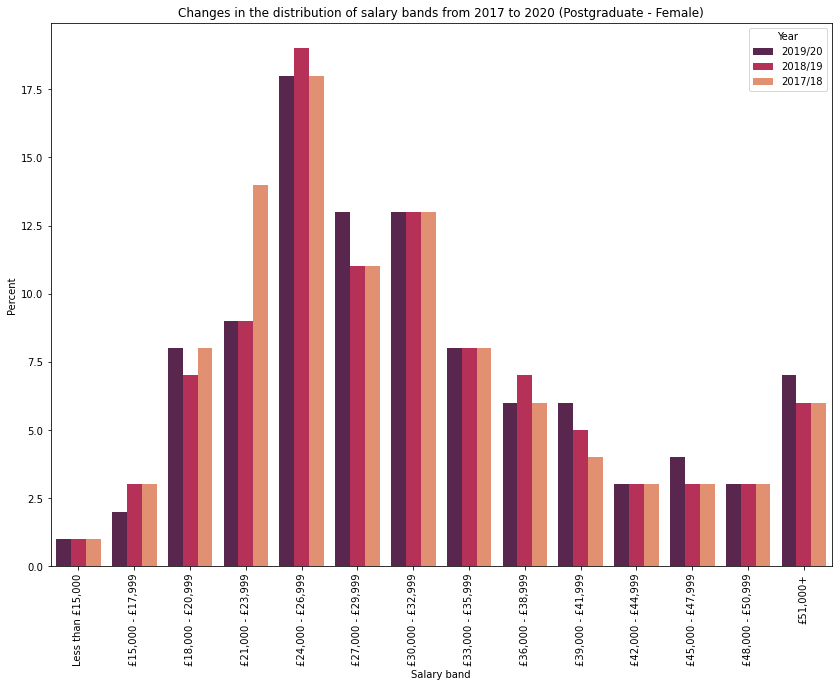

In [97]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_postgrad_most_employed_female,
            palette="rocket")

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Postgraduate - Female)")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

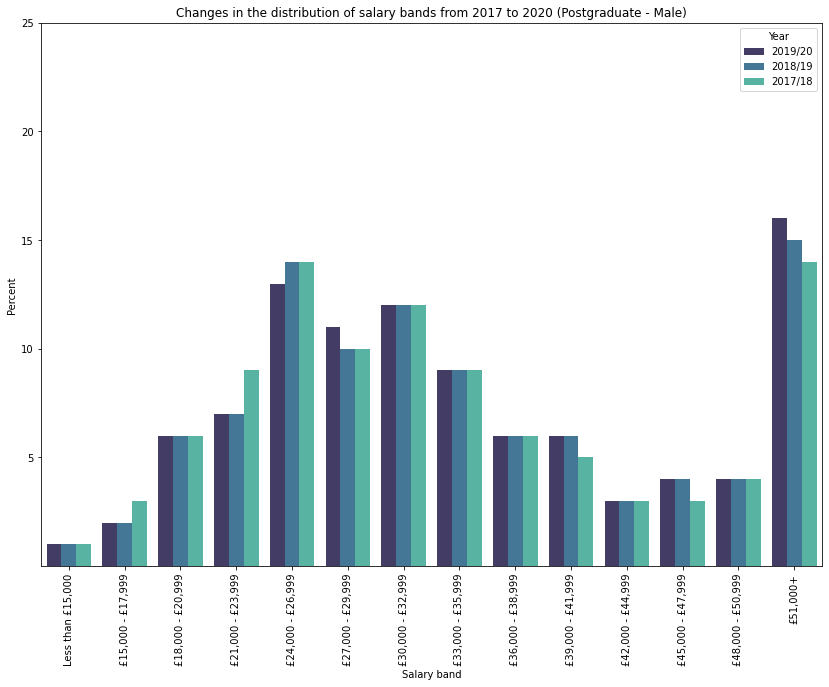

In [101]:
# The distribution of salary of all level
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Year", estimator=sum, 
            data=salary_postgrad_most_employed_male,
            palette="mako")

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Postgraduate - Male)")
plt.yticks([5,10,15,20,25])

plt.xticks(rotation=90)

In [82]:
# Subset of 2019/20
salary_postgrad_most_employed_1920 = salary_postgrad_most_employed[salary_postgrad_most_employed['Year'] == "2019/20"]

salary_postgrad_most_employed_1920.head()

Gender        Salary band     Year  Percent
0  Female  Less than £15,000  2019/20      1.0
1    Male  Less than £15,000  2019/20      1.0
2  Female  £15,000 - £17,999  2019/20      2.0
3    Male  £15,000 - £17,999  2019/20      2.0
4  Female  £18,000 - £20,999  2019/20      8.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Less than £15,000'),
  Text(1, 0, '£15,000 - £17,999'),
  Text(2, 0, '£18,000 - £20,999'),
  Text(3, 0, '£21,000 - £23,999'),
  Text(4, 0, '£24,000 - £26,999'),
  Text(5, 0, '£27,000 - £29,999'),
  Text(6, 0, '£30,000 - £32,999'),
  Text(7, 0, '£33,000 - £35,999'),
  Text(8, 0, '£36,000 - £38,999'),
  Text(9, 0, '£39,000 - £41,999'),
  Text(10, 0, '£42,000 - £44,999'),
  Text(11, 0, '£45,000 - £47,999'),
  Text(12, 0, '£48,000 - £50,999'),
  Text(13, 0, '£51,000+')])

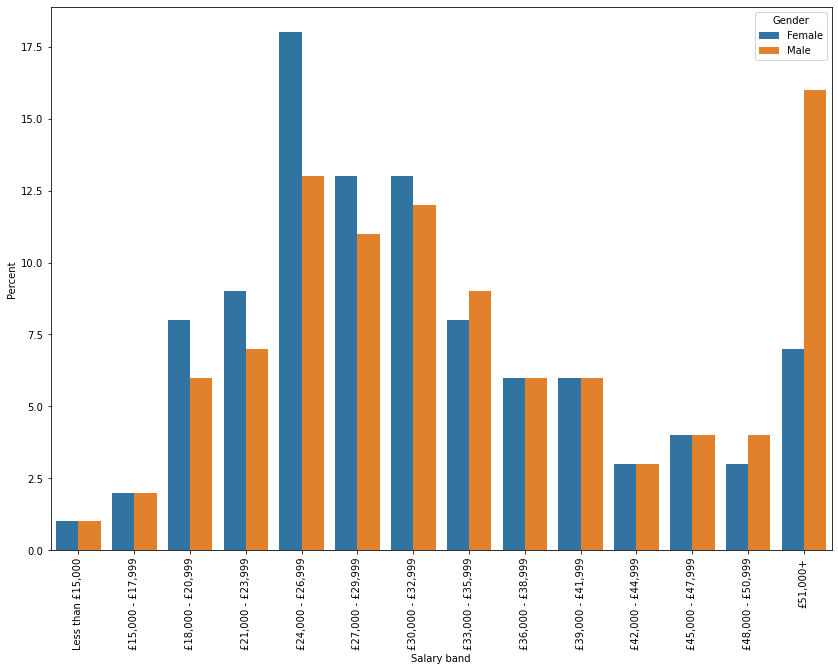

In [83]:
# The distribution of salary in 2019-20, by gender
plt.subplots(figsize=(14,10))

sns.barplot(x="Salary band", y="Percent", 
            hue="Gender", estimator=sum, data=salary_postgrad_most_employed_1920)

plt.title("Changes in the distribution of salary bands from 2017 to 2020 (Undergraduate - Female)")

plt.xticks(rotation=90)